# Scikit-Learn Package

By now you are probably fatigued with understanding the details of writing the code to split data, doing Cross Validation, storing the results, and looking at descriptive stats associated with the resulting RMSE. And this is all before considering the various parameters associated with whatever method we wish to implement.

Each function has its own set of requirements which may not extend to other functions. What we need (well, what we would like) is a framework to streamline this process and automate it as much as possible but not at the expense of understanding the results.

There is a module called [**scikit-learn**](https://scikit-learn.org/stable/) which can help make Machine learning a great deal easier by automating many activities that would otherwise be tedious and error prone. 

<img src="pics/scikit.png" width ="600" height=600>

From the project Github:

> scikit-learn is a Python module for machine learning built on top of SciPy and is distributed under the 3-Clause BSD license. The project was started in 2007 by David Cournapeau as a Google Summer of Code project, and since then many volunteers have contributed. See the About us page for a list of core contributors.

The scikit-lean learn module provides a uniform interface for calling different algorithms while simplifying the data splitting and calculation of various performance measures. It supports many different model types and also provides the ability to tune hyper parameters. Here are some of the features:

- Classification:  SVM, nearest neighbors, random forest
- Regression:  SVR, nearest neighbors, random forest
- Clustering:  k-Means, spectral clustering, mean-shift
- Preprocessing:  Transformation, scaling, feature extraction
- Dimensionality Reduction:  k-Means, feature selection, non-negative matrix factorization
- Model Selection:  Grid search, cross validation, metrics

## Compared to R

scikit-learn is not really a direct competitor to anything in R, at least in my opinion. R is a statistical framrwork first and formost which means that it has always had many statistical functions, and what we now consider to be Machine Learning methods, readily available. Over time, R has offered packages like [caret](http://topepo.github.io/caret/index.html), [tidymodels](https://www.tidymodels.org/), and [mlr](https://mlr.mlr-org.com/) (now deprecated), which represent either front ends to standalone ML packages or a rewrite of various methods. In this regard, R has had a big head start on Python. Keep in mind that data frames, which are a native object in R, are not native to Python and it was only when the Pandas module was created, that we could get similar capability. 

Moreover, there is a wealth of online support for these various packages which simplifies ML projects in R. There is an excellent book called [Applied Predictive](http://appliedpredictivemodeling.com/) Modeling which, though it uses the caret pacakge as a default framework, provides a great overview of general considerations relative to Machine Learning and Predictive Modeling. 

All this said, the scikit-learn module leverages the fact that Python was and is an easy-to-use general programming language. This makes Python a great language to develop and deploy models. The scikit-learn module is an attempt at a ground-up framework to provide ML capability. While there have been other such Python implementations, scikit-learn has the current "mind share" in this space. In my view, if you are going to do any type of Predictive Modeling or Machine Learning in Python then scikit-learn is the way to go.

### Graphics

I won't hide my opinion here that I think that R graphics, particularly ggplot2, is superior to Python graphics such as matplotlib and seaborn. (There is a reason that the [plotnine](https://towardsdatascience.com/how-to-use-ggplot2-in-python-74ab8adec129) package exists to give ggplot2 capability to Python users). However, if you are going to be working in the Python universe then you should spend time understanding matplotlib and seaborn because much of the documentation and support literature you will encounter will make reference to these frameworks. Also if you have a MATLAB background then you already have some experience with matplotlib. The scikit-learn package has a number of built-in plot types that are peculiar to various algorithms so before you try to produce a plot you might first check to see if something already exists before trying to make your own plots. 

## Putting scikit-learn to Work

It’s easy to get lost in all that we have been doing up until this point so let’s review what the typical predictive modeling workflow will look like. 

   - Data Import (read in csv files, extractfrom a database, read from internet)
   - Do some Data Visualization
   - Data Prep (We haven’t done much of this just yet) 
  
       * Find Missing Data and perform imputation 
       * Scaling 
       * Create dummy variables
       * One hot encoding
       * Dimensionality Reduction
   
   
   - Data Splitting (training / test) 
   - Determine split ratio - K-Fold Cross Validation (repeated)
   - Modeling / Prediction
   - Evaluation
   
## Back To The Beginning

It is implied that in predictive modeling the ultimate goal is to generate a model that could be reasonably applied to new data. As we have learned, it is best to train any model on a data set that has been (re)sampled in some way (e.g. K Fold CV) which should help provide a more realistic estimate of “out of sample” error.

In our earliest example we tried to predict the MPG from mtcars using a basic linear modeling function. The caret package provides a uniform way to do this which allows us to easily substitute in alternative functions without having to majorly change our code.

We can call the train function in such a way as to pass in any arguments that are specific to a given method though in a way we could do for other methods. We can also tell the train function that we want to evaluate RMSE as a performance measure. That is, it will “know” that our primary performance measure for a model is RMSE. Before we do that, however, we’ll make a test / train pair. One way to do this is write our own functions to sample some proportion of a data frame.

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

# How many rows ?
print("Number of rows in the data frame is:",len(mtcars))

# Let's sample 80% of the data into a training data set
prop = int(.8*len(mtcars))
train = mtcars[0:prop]
print("Number of rows in training set:", len(train))

# Let's sample 20% of the data into a test data set
test = mtcars[prop:prop+(len(mtcars)-prop)]
print("Number of rows in test set:", len(test))


Number of rows in the data frame is: 32
Number of rows in training set: 25
Number of rows in test set: 7


Let's write a function to do this.

In [2]:
def sampler(df=mtcars,prop=.80):
    
    # Let's sample 80% of the data into a training data set
    prop = int(.8*len(df))
    train = df[0:prop]
   
    # Let's sample 20% of the data into a test data set
    test = df[prop:prop+(len(df)-prop)]
    
    return([train,test])

train, test = sampler()
print("Length of taining is:",len(train))
print("Length of test is:",len(test))


Length of taining is: 25
Length of test is: 7


We could actually write a helper function to do things like shuffle the data frame before we sample or specify whether to use boostrap sampling - if we wanted to. This winds up taking more work but gives us some generality.

In [3]:
def shuffler(length=32, boot=False):
    import random
    randomList = []
    done = False
    
    if (boot):
        for ii in range(0,length):
            randomList.append(random.randint(0,(length-1)))
    else:
        while not done:
            mynum = random.randint(0,(length-1))
            if (mynum not in randomList or len(randomList) < (length-1)):
                randomList.append(mynum)
            else:
                done = True    
    return(randomList)

shuffledList = shuffler()


def sampler(df=mtcars,prop=.80,shuffle=False,boot=False):
    
    if (shuffle,boot):
        shuffledList = shuffler(len(df))
        df = df.iloc[shuffledList]
    
    # Let's sample 80% of the data into a training data set
    prop = int(.8*len(df))
    train = df[0:prop]
   
    # Let's sample x% of the data into a test data set
    test = df[prop:prop+(len(df)-prop)]
    
    return([train,test])

train, test = sampler(prop=.8,boot=True)
print("Length of taining is:",len(train))
print("Length of test is:",len(test))

test

Length of taining is: 24
Length of test is: 7


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
11,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
27,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
12,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
11,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
21,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2
15,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
29,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6


## A Better Way

So if you've been paying attention in the previous lectures you will remember that I had use a method called "sample" with respect to Pandas dataframes. So why would you write your own sampling functions when you have something better and easier at your disposal ? This is entirely true.

In [4]:
mtcars.sample(n=len(mtcars)).head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
31,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
30,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
20,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4


In [5]:
def newsampler(df=mtcars,boot=False,prop=.8):
    
    if (boot):    
        df = df.sample(n=len(df),replace=True)
    else:
        df = df.sample(n=len(df))
    
    # Let's sample prop% of the data into a training data set
    prop = int(prop*len(df))
    train = df[0:prop]
   
    # Let's sample the rest of the data into a test data set
    test = df[prop:prop+(len(df)-prop)]
    
    return([train,test])

train, test = newsampler(prop=.7,boot=True)
test
    

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
30,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
10,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
28,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
17,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
31,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2
25,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
22,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2


So we could now use this to model the training data and later apply it to the test data.

In [6]:
import statsmodels.api as sm 
train, test = newsampler()

def rmse(actual,predictions):
   from math import sqrt
   myrmse = sqrt(((predictions-actual)**2).mean())
   return round(myrmse,3)

# Do regression and figure out rmse for training 
    
result = sm.OLS(train.mpg,sm.add_constant(train.wt)).fit()
train_rmse = rmse(train.mpg,result.predict(sm.add_constant(train.wt)))
print("Train RMSE:", train_rmse)

test_rmse  = rmse(test.mpg,result.predict(sm.add_constant(test.wt)))
print("Test RMSE:", test_rmse)

Train RMSE: 2.824
Test RMSE: 3.509


## Scikit to The Rescue

So we wrote a function to sample some proportion of a data frame to create a training data set and to also have a test data set comprised of the remaining data. Common training and test proportions include 80 / 20, 70 / 30, and 60 / 40. We didn't really need to write a function as the scikit-learn package has a function that will us do this. We'll also introduce a convention used in Python Machine Learning where we split the label (what is being predicted) into a separate structure. 

The remaining information represents the predictor variable(s). In the parlance of the Python, we refer to the former as "y" (lower case) and the latter as "X" (upper case). We do this in large part because there is a helper function called **train_test_split** which expects this format to do its work. 

In [7]:
from sklearn.model_selection import train_test_split

y = mtcars.mpg
X = mtcars.drop('mpg',axis=1)

# Next we create a training and test pair with 80 / 20 proportions

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print("Dimensions of X_train:", X_train.shape)
print("Dimensions of X_test", X_test.shape)

X_train.head()

# Now we can use this data with our OLD model

result = sm.OLS(y_train,sm.add_constant(X_train.wt)).fit()
train_rmse = rmse(y_train,result.predict(sm.add_constant(X_train.wt)))
test_rmse  = rmse(y_test,result.predict(sm.add_constant(X_test.wt)))

print("Train and Test RMSE are:",(train_rmse, test_rmse))

Dimensions of X_train: (25, 10)
Dimensions of X_test (7, 10)
Train and Test RMSE are: (2.881, 3.367)


So this is helpful in that we don't need to write our own sampler function. In fact, if you look for examples on Google you will rarely see situations wherein someone created their own sample function although it is not a bad thing to do. It's just that the ML community prefers to leverage what scikit-learn has to offer so you will see the **train_test_split** function used extensively. 

Of course, running one iteration on a train / test pair isn't very useful. We already discovered that K-fold cross validation is a technique to split up a data set into K-folds and systematically build training sets out of the combined K-1 folds while use the "holdout" fold as a test data set at some point in the process. This helps address situations wherein large variation due to outliers might be present in one fold but not another. the ultimatel goal is to build a model on a number of training data sets with the hopes that we can better predict model performance on unseen data. Here were use a helper function called **KFold** to provide us with  4 folds. The function handles the chopping of the data for us. 

In [8]:
from sklearn.model_selection import KFold

# Split the 
kf = KFold(n_splits=4)
print("Number of folds:", kf.get_n_splits(mtcars))

Number of folds: 4


So now we can look at the indices generated by **KFold**. We can then train our model on each of the "combined" folds and then apply it to the test fold. In this case we have 4 folds but we could experiment with various numbers. Our data isn't that large so we won't do that. 

In [9]:
for train_index, test_index in kf.split(mtcars):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31] TEST: [0 1 2 3 4 5 6 7]
TRAIN: [ 0  1  2  3  4  5  6  7 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31] TEST: [ 8  9 10 11 12 13 14 15]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 24 25 26 27 28 29 30 31] TEST: [16 17 18 19 20 21 22 23]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [24 25 26 27 28 29 30 31]


In [10]:
def rmse(actual,predictions):
   from math import sqrt
   myrmse = sqrt(((predictions-actual)**2).mean())
   return round(myrmse,3)

X = mtcars.drop('mpg',axis=1)
y = mtcars.mpg

scores = []

for fold_number, (train_index, test_index) in enumerate(kf.split(mtcars)):

    # Do regression and figure out rmse for training and test
    
    X_train, X_test = mtcars.iloc[train_index], mtcars.iloc[test_index]

    result = sm.OLS(X_train.mpg,sm.add_constant(X_train.wt)).fit()
    train_rmse = rmse(X_train.mpg,result.predict(sm.add_constant(X_train.wt)))
    test_rmse  = rmse(X_test.mpg,result.predict(sm.add_constant(X_test.wt)))
    
    scores.append([fold_number,train_rmse,test_rmse])
    
rmse_errors = pd.DataFrame(scores,columns=['fold_number','train','test'])
print(rmse_errors)



   fold_number  train   test
0            0  3.110  2.440
1            1  3.277  1.879
2            2  2.070  4.821
3            3  3.087  2.571


In [11]:
import numpy as np
np.mean(rmse_errors)

fold_number    1.50000
train          2.88600
test           2.92775
dtype: float64

In [12]:
rmse_errors.describe()

,fold_number,train,test
count,4.000000,4.000000,4.000000
mean,1.500000,2.886000,2.927750
std,1.290994,0.550549,1.297362
min,0.000000,2.070000,1.879000
25%,0.750000,2.832750,2.299750
50%,1.500000,3.098500,2.505500
75%,2.250000,3.151750,3.133500
max,3.000000,3.277000,4.821000


## Getting Better

So this nice in that the **KFolds** function does the chopping up of the data for us. We don't have to write our own function. One thing that the Machine Learning does when using Python is to separate what is being predicted, in this case the **mpg** variable, from the data being used to make the prediction. One typically uses the nomenclature of **y** (lower case) to refer to the former and **X** (upper case) to refer to the latter. Note that while this isn't strictly necessary, at least as far as I can determine, it is a popular convention. So I'll just rewrite what we have above.

In [13]:
def rmse(actual,predictions):
   from math import sqrt
   myrmse = sqrt(((predictions-actual)**2).mean())
   return round(myrmse,3)

X = mtcars.drop('mpg',axis=1)
y = mtcars.mpg

scores = []
import statsmodels.api as sm
for fold_number, (train_index, test_index) in enumerate(kf.split(mtcars)):
    
    ## Get Training Matrix and Vector

    X_train = X.iloc[train_index]
    y_train = y[train_index]

    ## Get Testing Matrix Values

    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

    result = sm.OLS(y_train,sm.add_constant(X_train.wt)).fit()
    train_rmse = rmse(y_train,result.predict(sm.add_constant(X_train.wt)))
    test_rmse  = rmse(y_test,result.predict(sm.add_constant(X_test.wt)))
    
    scores.append([fold_number,train_rmse,test_rmse])
    
rmse_errors = pd.DataFrame(scores,columns=['fold_number','train','test'])
print(rmse_errors)


   fold_number  train   test
0            0  3.110  2.440
1            1  3.277  1.879
2            2  2.070  4.821
3            3  3.087  2.571


Also understand that there are performance metrics available to using the **sklearn.metrics** functions to help us. We can get the Mean Sqaured Error and then take the square root of that to obtain the RMSE / Root Mean Squared Error.  

In [14]:
from sklearn.metrics import mean_squared_error

X = mtcars.drop('mpg',axis=1)
y = mtcars.mpg

scores = []
import statsmodels.api as sm
for fold_number, (train_index, test_index) in enumerate(kf.split(X)):
    
    ## Get Training Matrix and Vector

    X_train = X.iloc[train_index]
    y_train = y[train_index]

    ## Get Testing Matrix Values

    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

    
#   X_train, X_test = mtcars.iloc[train_index], mtcars.iloc[test_index]

    result    = sm.OLS(y_train,sm.add_constant(X_train.wt)).fit()
    train_mse = mean_squared_error(y_train,result.predict(sm.add_constant(X_train.wt)))
    test_mse  = mean_squared_error(y_test,result.predict(sm.add_constant(X_test.wt)))
    
    train_rmse = train_mse**0.5
    test_rmse  = test_mse**0.5
    
    scores.append([fold_number,train_rmse,test_rmse])
    
rmse_errors = pd.DataFrame(scores,columns=['fold_number','train','test'])
print(rmse_errors)

   fold_number     train      test
0            0  3.109674  2.439916
1            1  3.276833  1.879322
2            2  2.070390  4.821133
3            3  3.086567  2.571099


### Linear Regression

So it turns out that scikit-learn has its own methods for Linear Regression that include various options such as to use Ridge or Lasso. We'll now replace the simple OLS method with something from scikit-learn.


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

X = mtcars.wt
y = mtcars.mpg

kf = KFold(n_splits=4)

scores = []

for fold_number, (train_index, test_index) in enumerate(kf.split(X)):
    
    ## Get Training Matrix and Vector

    X_train = X.iloc[train_index]
    y_train = y[train_index].values.reshape(-1,1)

    ## Get Testing Matrix Values

    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index].values.reshape(-1,1)

    model = LinearRegression()
    reg = model.fit(X_train.values.reshape(-1,1),y_train)
    
    y_train_preds = model.predict(X_train.values.reshape(-1,1))
    y_test_preds = model.predict(X_test.values.reshape(-1,1))
     
    train_mse = mean_squared_error(y_train,y_train_preds)
    test_mse  = mean_squared_error(y_test,y_test_preds)
    
    train_rmse = math.sqrt(train_mse)
    test_rmse = math.sqrt(test_mse)
    
    scores.append([fold_number,train_rmse,test_rmse])
    
rmse_errors = pd.DataFrame(scores,columns=['fold_number','train_rmse','test_rmse'])
print(rmse_errors)


   fold_number  train_rmse  test_rmse
0            0    3.109674   2.439916
1            1    3.276833   1.879322
2            2    2.070390   4.821133
3            3    3.086567   2.571099


The thing with scikit-learn functions is that they want input in a particular format so some type of conversion is ususally required which is why you saw things like the **X_test.values.reshape(-1,1)** statement above. Sometimes it's easier to convert the pandas data frame into an array. In this example, we'll do just the regression piece:

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

mtvals = mtcars.values            # creates a numpy array
type(mtvals)                      # Observe the data type

y = mtvals[:,0]         # Gets the mpg column
X = mtvals[:,1:10]      # Gets everything BUT the mpg column

# Setup a new model
model = LinearRegression()

# fit the model
reg = model.fit(X,y)

# Look at the equation coeeficients 
print("Regression equation coefficients:\n", reg.coef_)

# Look at the intercept
print("\nRegression equation intercept:",reg.intercept_)

# Do a prediction
y_preds = reg.predict(X)

# Get mean sqaured error
print('Root Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y, y_preds)))

# Get R^2
print('Coefficient of determination: %.2f'
      % r2_score(y, y_preds))

Regression equation coefficients:
 [-0.16881263  0.01623358 -0.02424055  0.70590083 -4.03214213  0.86828517
  0.36470431  2.55092849  0.50293618]

Regression equation intercept: 12.830835492131701
Root Mean squared error: 2.15
Coefficient of determination: 0.87


It might be helpful to know that most models have a default score method that defaults to something that makes sense for the method being used. In the case of regression, the default scoring metric is the R^2 value

In [17]:
reg.score(X,y).round(2)

0.87

## A Small Review

So now want to clean all of this up into something that can serve as an example for your future work. Things are kind of messy right no so let's review what it is we would generally want to do:

1. Split a data frame into what is being predicted vs the predictor variables
2. Use the training data as a source against which to do the cross fold valiation
3. For each fold, apply whatever model you want (e.g. Linear Regression) and capture metrics
4. Look at the performance metric(s) (e.g. RMSE) across each fold or in aggregate

One way to do this is write a function that implements the above. It's not hard to do.

In [18]:
ii = 0
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

rmse_train_info = []
rmse_test_info = []

mtvals = mtcars.values            # creates a numpy array

y = mtvals[:,0]         # Gets the mpg column
X = mtvals[:,1:10]      # Gets everything BUT the mpg column

kfold = KFold(3)

# Main processing loop for the folds

for train_index, test_index in kfold.split(X, y):
  # split data coming from each of the 4 folds
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
        
        # Initialize a model
        regress = LinearRegression()
        
        # Fit the Model
        regress.fit(X_train,Y_train)
        
        # Predict the target on the training dataset
        predict_train = regress.predict(X_train)
  
        # Root Mean Squared Error on training dataset
        rmse_train = mean_squared_error(Y_train,predict_train)**(0.5)
        print("Training RMSE for loop",ii,"is:", rmse_train)
       
        # Append the rmse to the rmse_train_info vector
        rmse_train_info.append(rmse_train)
        
        # Now let's do a prediction on the test data
        predict_test = regress.predict(X_test)
        
        # Root Mean Squared Error on training dataset
        rmse_test = mean_squared_error(Y_test,predict_test)**(0.5)
        print("Test RMSE for loop",ii,"is:", rmse_test,"\n")
       
        # Append the rmse to the rmse_test_info vector
        rmse_test_info.append(rmse_test)

        ii = ii+1
        

Training RMSE for loop 0 is: 2.228744351236648
Test RMSE for loop 0 is: 2.666357281375105 

Training RMSE for loop 1 is: 1.1597013745163227
Test RMSE for loop 1 is: 4.317008703583665 

Training RMSE for loop 2 is: 2.0999845760684352
Test RMSE for loop 2 is: 3.2158664154053187 



## Easier Cross Validation

Or, we could look at what scikit-learn can do for us. The following introduces the  **cross_val_score** and **cross_validate** functions which provide a wrapper around a given **kfolds** object while also applying a predefined scoring method. While this approach results in less code it also provides less transparency. So what we do here is:

  - Create a Model object (e.g. Regression)
  - Specify one or more scoring metrics
  - Create a KFold object with at least two folds
  - Pass the above information to the cross_validate function

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

mtvals = mtcars.values  # Create an array version of the data
y = mtvals[:,0]         # Gets the mpg column
X = mtvals[:,1:10]      # Gets everything BUT the mpg column

# Setup the model 

model = LinearRegression()

# We have to designate a scoring metric 
mse = make_scorer(mean_squared_error)

# Set up some folds
kfold = KFold(n_splits=4)

# The cross_validate function handles the execution of the model
# as well as the management of the folds

cv  = cross_validate(model,X,y,scoring=(mse), cv=kfold, return_train_score=True)

# Here we print out the rmse of the test / holdout data
print("Test RMSE per fold:",(cv['test_score']**0.5))

# Look at the mean of this RMSE array
print("Mean Test RMSE:",(cv['test_score']**0.5).mean().round(2))

# Look at the mean of this RMSE array
print("Mean Train RMSE:",(cv['train_score']**0.5).mean().round(2))


Test RMSE per fold: [2.78732274 3.83729498 5.03527484 3.26172188]
Mean Test RMSE: 3.73
Mean Train RMSE: 1.87


A nice side effect of this approach is that we can easily substitute in other methods as long as they make sense of course. In other words, since we are predicting a continuous outcome we need to select a method that supports this intent. Let's try Ridge regression. 

In [20]:
from sklearn import tree
from sklearn.linear_model import Ridge
    
# Setup the model 

model = Ridge()

# We have to designate a scoring metric 
mse = make_scorer(mean_squared_error)

# Set up some folds
kfold = KFold(n_splits=4)

# The cross_validate function handles the execution of the model
# as well as the management of the folds

cv  = cross_validate(model,X,y,scoring=(mse), cv=kfold, return_train_score=True)

# Here we print out the rmse of the test / holdout data
print("Test RMSE per fold:",(cv['test_score']**0.5))

# Look at the mean of this RMSE array
print("Mean Test RMSE:",(cv['test_score']**0.5).mean().round(2))

# Look at the mean of this RMSE array
print("Mean Train RMSE:",(cv['train_score']**0.5).mean().round(2))


Test RMSE per fold: [2.33626326 2.9428611  4.59536042 2.57621531]
Mean Test RMSE: 3.11
Mean Train RMSE: 1.97


We could always use Repeated Cross Fold Validation. This is fairly straightforward but you have to know what function to call. 

In [21]:
from sklearn.model_selection import RepeatedKFold

model = Ridge()

# We have to designate a scoring metric 
mse = make_scorer(mean_squared_error)

# Set up some folds
repeat_kfold = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)

# The cross_validate function handles the execution of the model
# as well as the management of the folds

cv  = cross_validate(model,X,y,scoring=(mse), cv=repeat_kfold, return_train_score=True)

# Here we print out the rmse of the test / holdout data
print("Test RMSE per fold:",(cv['test_score']**0.5))

# Look at the mean of this RMSE array
print("Mean Test RMSE:",(cv['test_score']**0.5).mean().round(2))

# Look at the mean of this RMSE array
print("Mean Train RMSE:",(cv['train_score']**0.5).mean().round(2))


Test RMSE per fold: [4.47752136 2.44282638 2.84717458 2.64975775 2.8450318  2.52470336
 3.3578655  2.98819652 1.87052263]
Mean Test RMSE: 2.89
Mean Train RMSE: 2.0


So it is important to know that there are a number of built in scoring metrics available for regression and classification. These are available to assist with the evaluation of any models that you make and could simplify your work. Check the [reference](https://scikit-learn.org/stable/modules/model_evaluation.html) page for a more detailed discussion of such metrics. 

<img src="pics/rm.png" width ="600" height=600>

In [22]:
model = Ridge()

# These metrics are known to scikit
scoring = {'neg_mean_squared_error': 'neg_mean_squared_error',
           'r2':'r2'}

# Set up some folds
repeat_kfold = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)

# The cross_validate function handles the execution of the model
# as well as the management of the folds

cv  = cross_validate(model,
                     X,y,
                     scoring=scoring, 
                     cv=repeat_kfold, 
                     return_train_score=True)

# Here we print out the rmse of the test / holdout data
print("Test RMSE per fold:",np.sqrt(np.abs(cv['test_neg_mean_squared_error'])))

# Here we print out the r2of the test / holdout data
print("Test R2 per fold:",cv['test_r2'])


Test RMSE per fold: [4.47752136 2.44282638 2.84717458 2.64975775 2.8450318  2.52470336
 3.3578655  2.98819652 1.87052263]
Test R2 per fold: [0.69985352 0.62492573 0.34826034 0.79611432 0.80087933 0.74496963
 0.66057129 0.75612977 0.89198932]


## Hyperparamaters

Linear Regression is failry straighforward and there aren't many arguments to supply to the function although there are a couple of “hyperparameters” which are arguments to a given method that you can set before you call the method. In this case there are two hyperparameters called "alpha" and "solver" that assume default variables if we don’t supply values. There is even a function called **RidgeCV** which will handle some of this stuff for us although it is specific to the **Ridge** method. Here is how we could use it to find the best value for **alpha**. 

In [23]:
from sklearn.linear_model import RidgeCV

cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)

# We have to designate a scoring metric 
mse = make_scorer(mean_squared_error)

# define search
search = RidgeCV(alphas=np.arange(0, 1, 0.1), cv=cv, scoring=(mse))

# perform the search
results_ridge = search.fit(X, y)

print('RidgeCV RMSE: %.3f' % results_ridge.best_score_**0.5)
print('RidgeCV Best Alpha: %s' % results_ridge.alpha_)

RidgeCV RMSE: 3.371
RidgeCV Best Alpha: 0.0


We can also call a more general function to handle the search for an ideal set of parameters in relation to optimizing target metric. If our desired score is to minimize the RMSE then we can indicate this in the scoring paramter. We can also provide a parameter grid with values we want to be evaluated as part of this optimization.

In [24]:
from sklearn.model_selection import GridSearchCV

# create model
model = Ridge()

# Create a grid of parameters to be evaluated. Note that
# this is specific to the method being used
param_grid={'alpha': np.arange(0,1,0.1)}

# do the grid search
search = GridSearchCV(model, param_grid, scoring=(mse), cv=cv, n_jobs=-1)

# Get the results
results_gridsearch = search.fit(X, y)

# summarize
print('Grid_Search RMSE: %.3f' % results_gridsearch.best_score_**0.5)
print('Grid_Search Config: %s' % results_gridsearch.best_params_)

Grid_Search RMSE: 3.371
Grid_Search Config: {'alpha': 0.0}


In [25]:
# Let's expand the parameter dictionary to include "solver"

model = Ridge()

# Here we add in additional parameters into the grid
param_grid={'alpha': np.arange(0,1,0.1),
            'solver': ['svd', 'cholesky', 'lsqr']}

search = GridSearchCV(model, param_grid, scoring=(mse), cv=cv, n_jobs=-1)

# perform the search
results_gridsearch = search.fit(X, y)

# summarize
print('Grid_Search RMSE: %.3f' % results_gridsearch.best_score_**0.5)
print('Grid_Search Best Parameter Config: %s' % results_gridsearch.best_params_)

Grid_Search RMSE: 3.371
Grid_Search Best Parameter Config: {'alpha': 0.0, 'solver': 'svd'}


## Alternative Input Formats

One of the more challening things when working with data is that some methods seem to want the input in a certain format. Let's revisit the opening section when we separated the mtcars data into X and y which is the preferred way of indicating what is being used to predict and outcome. In using various scikit functions, I find myself having to reshape the data or turning it into an array to accomodate the input requirements of various functions. In all fairness, I have had to do the same thing when using R so it's not unique to a given language. 

In [26]:
y = mtcars.mpg
X = mtcars.drop('mpg',axis=1)

# X is a pandas dataframe
print("X is of type:",type(X))

# y is a Series which is comparable to a vector in R
print("y is of type:",type(y))

# Next we create a training and test pair with 80 / 20 proportions
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Create and fit the model
lr_mod = LinearRegression()
lr_mod.fit(X_train,y_train)

# Do some scoring
y_lr_preds = lr_mod.predict(X_test)


from sklearn.metrics import mean_squared_error
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_lr_preds)))

X is of type: <class 'pandas.core.frame.DataFrame'>
y is of type: <class 'pandas.core.series.Series'>
RMSE:  2.6647906332944404


So compare this to the version we used ealrier when we first converted the mtcars data frame into a numpy array. At this point things still work although we have lost the feature names in the X input which is now an array. You might feel that this is academic but later when we look at classification predictions, you will see that knowing how to reshape and manipulate X and y will come in handy as you use various functions in scikit. 

In [58]:
mtvals = mtcars.values            # creates a numpy array

# note we have to index by number since the names are no longer available
y = mtvals[:,0]         # Gets the mpg column
X = mtvals[:,1:10]      # Gets everything BUT the mpg column

# X is a numpy array
print("X is of type:",type(X))

# y is a numpy array
print("y is of type:",type(y))

# Next we create a training and test pair with 80 / 20 proportions
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Create and fit the model
lr_mod = LinearRegression()
lr_mod.fit(X_train,y_train)

# Do some scoring
y_lr_preds = lr_mod.predict(X_test)

from sklearn.metrics import mean_squared_error
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_lr_preds)))

X is of type: <class 'numpy.ndarray'>
y is of type: <class 'numpy.ndarray'>
RMSE:  3.1968684787784354


In [48]:
lr_mod.score(X_test,y_test)

0.18070311098490532

### The Null Model

Keep in mind that we are assuming that whatever we are doing (or plan to do) is better than doing little or nothing. That is, we could just make our model reflect the average MPG of the training data and leave it at that. After all, why go to the trouble of writing code and testing out different methods if we could do just as well by going with the average MPG approach. scikit-learn has what is known as a "dummy" model function that can implement this "method". First, check out this graph which shows us how the Null model might look.

Text(0.5, 1.0, 'Null Model - Mean MPG')

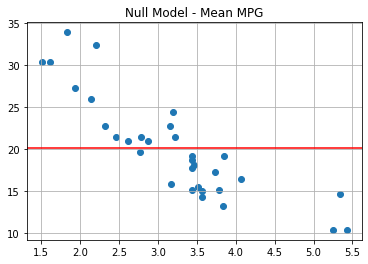

In [59]:
import matplotlib.pyplot as plt
plt.scatter(mtcars.wt,mtcars.mpg)
plt.axhline(np.mean(mtcars.mpg), color="red")
plt.grid()
plt.title("Null Model - Mean MPG")

Now we'll implement the model using scikit-learn

In [30]:
# Let's import what we need - could be redundant but
# this will show you what you need to reproduce this

from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from numpy import mean
from numpy import absolute
from numpy import sqrt

# Reread the mtcars file
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

# Create the X, y combo
X = mtcars.drop("mpg",axis=1)
y = mtcars.mpg

# Now we make a Dummy model that uses the mean of the dependent variable
dummy_mean = DummyRegressor(strategy='mean')

# Set up a scores list to collect RMSE as we do KFold validation
scores = []

# try with KFold
kf = KFold(n_splits=4,shuffle=True)
for train_index, test_index in kf.split(X):
     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
     y_train, y_test = y[train_index], y[test_index]
    
     dummy_mean.fit(X_train,y_train)
     ypreds = dummy_mean.predict(X_test)
     scores.append(mean_squared_error(y_test,ypreds,squared=False))

print("Mean RMSE is %f" % mean(scores))

# The RMSE emerging from the following  should be comparable to what we did above 
# After all, this is just an automatic way of doing the above that uses the same
# folds created by the KFold object

cross_val_scores = cross_val_score(dummy_mean, 
                                   X, 
                                   y, 
                                   scoring='neg_mean_squared_error',
                                   cv=kf, 
                                   n_jobs=-1)

print("Mean RMSE for cross_val_score is %f " % sqrt(mean(absolute(cross_val_scores))))

Mean RMSE is 5.946926
Mean RMSE for cross_val_score is 6.128989 


So the RMSE is not particularly different. After all, we used the same folds and the second approach just implemented **cross_val_score** function to make things easier albeit less transparent. The larger point here is that I wanted to show how to implement a null / baseline model using scikit. We've already looked at a number of examples involving regression and variants thereof but here is one more just to contrast this with the dummy model.

In [31]:
# Look at an actual Regresssion Model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
cross_val_scores = cross_val_score(reg, 
                                   X, 
                                   y, 
                                   scoring='neg_mean_squared_error',
                                   cv=kf, 
                                   n_jobs=-1)
print("Mean RMSE for cross_val_score is %f " % sqrt(mean(absolute(cross_val_scores))))


Mean RMSE for cross_val_score is 3.689336 
